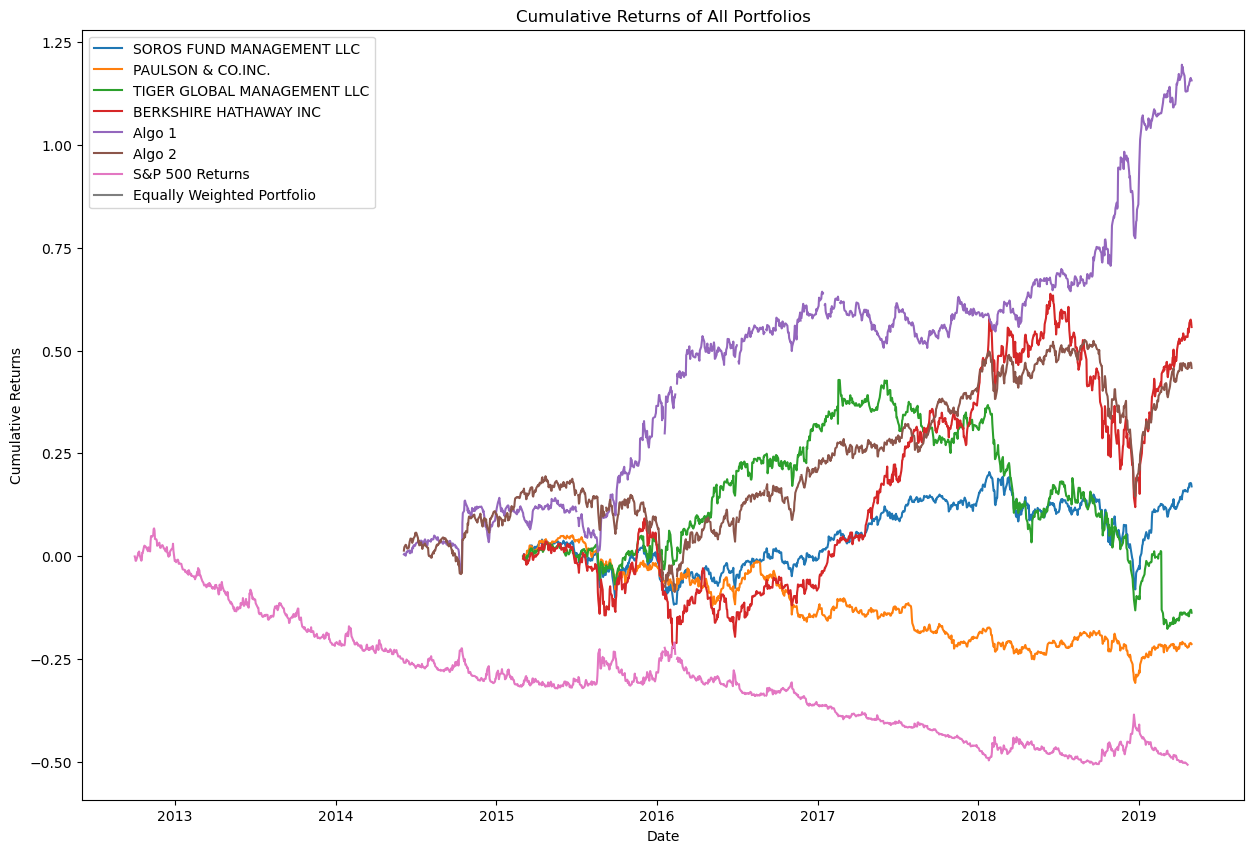

C:\Users\jan\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


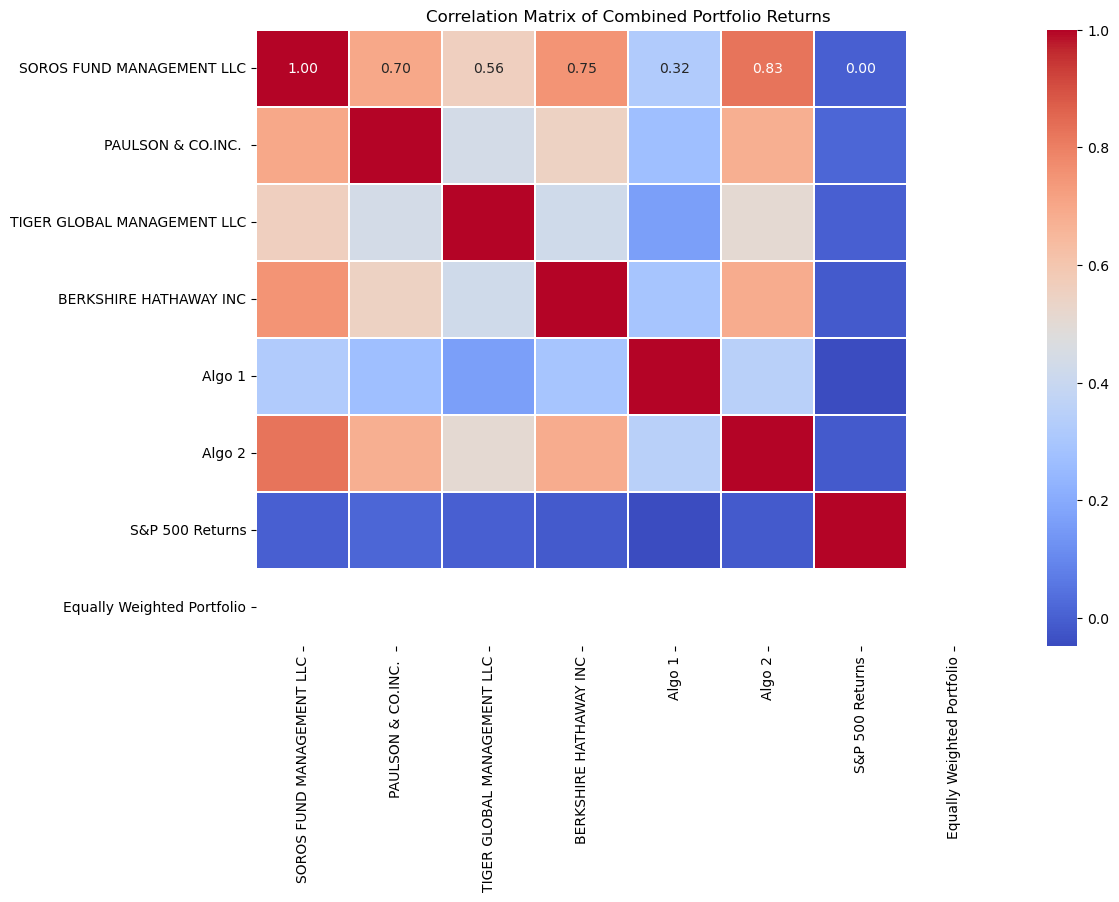

Combined portfolio returns exported to 'combined_portfolio_returns.csv'.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Whale Returns data
whale_returns = pd.read_csv('whale_returns.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date')
whale_returns.dropna(inplace=True)

# Read Algorithmic Returns data
algo_returns = pd.read_csv('algo_returns.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date')
algo_returns.dropna(inplace=True)

# Read S&P 500 history data and clean it
sp500_history = pd.read_csv('sp500_history.csv', parse_dates=['Date'], date_format='%d-%b-%y', index_col='Date')
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '').astype(float)
sp500_returns = sp500_history['Close'].pct_change().rename("S&P 500 Returns")
sp500_history.drop(columns=['Close'], inplace=True)

# Concatenate the returns data into a single DataFrame
combined_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis=1)

# Calculate daily returns for stocks
daily_returns_stocks = pd.concat([
    pd.read_csv('FTNT.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date')['Close'].pct_change(),
    pd.read_csv('VRTX.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date')['Close'].pct_change(),
    pd.read_csv('NVDA.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date')['Close'].pct_change(),
    pd.read_csv('WM.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date')['Close'].pct_change(),
    pd.read_csv('ECL.csv', parse_dates=['Date'], date_format='%Y-%m-%d', index_col='Date')['Close'].pct_change(),
], axis=1).rename(columns={"Close": "Stock Returns"})

# Calculate the equally weighted portfolio returns
weights = np.array([1/5] * 5)
equally_weighted_portfolio = daily_returns_stocks.dot(weights)

# Combine all returns data
combined_returns['Equally Weighted Portfolio'] = equally_weighted_portfolio

# Calculate cumulative returns for all data
cumulative_returns = (1 + combined_returns).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(15, 10))
for column in cumulative_returns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)
plt.title('Cumulative Returns of All Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend(loc="upper left")
plt.show()

# Calculate and plot the correlation matrix
correlation_matrix = combined_returns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.05)
plt.title('Correlation Matrix of Combined Portfolio Returns')
plt.show()

# Export combined returns to CSV
combined_returns.to_csv('combined_portfolio_returns.csv')
print("Combined portfolio returns exported to 'combined_portfolio_returns.csv'.")
